# Exploratory Data Analysis of the Flickr8k Dataset

In this notebook we will analyse the main characteristics of the Flickr8k Dataset. In particular, we will be using the version of this [Kaggle Dataset](https://www.kaggle.com/datasets/adityajn105/flickr8k/code?datasetId=623289&sortBy=voteCount). We will extract and comment the information as we run code. The transformations of the data before training the model will also be commented.

First, let's do the necessary imports.

## Imports

In [1]:
# Data manipulation
import numpy as np
import torch
import pandas as pd
from collections import Counter
import torchvision.transforms as T

# Visualization
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Other useful libraries
import os
import joblib

## Loading the Dataset

We will load the already processed dataset, meaning that we will load an instance of the `FlickrDataset` class, which already has the vocabulary processed, and the images and captions are stored in `.self` methods. The images haven't been changed yet. This will happen in the dataloaders, once they call the `__getitem__` method of the `FlickrDataset` class.

If you still don't have the `processed_dataset.joblib` file corresponding to the processed dataset, execute once the function `generate_and_dump_dataset()`. This will approximately take about 3 to 4 hours.

**Important**: Change the following paths to match the location where your data is stored.

In [2]:
DATA_LOCATION = '../data'
images_path = DATA_LOCATION + '/Images'
captions_file = DATA_LOCATION + '/captions.txt'

Now, let's use the `load()` function from the `Joblib` library to load the custom dataset stored in the `.joblib` file.

In [4]:
dataset = joblib.load(DATA_LOCATION + "/processed_dataset.joblib")

## Main characteristics

#### Description

The Flickr8 dataset is set of images from a variety of scenes, situations, people and animals. Each image has some captions associated. The data comes from the [Flickr webpage](https://www.flickr.com/), in particular, from 6 different Flickr Groups (which are essentially categories of images).

#### Number of images

In [5]:
len(np.unique(list(dataset.imgs)))

8091

#### Number of captions

In [6]:
len(list(dataset.captions))

40455

#### Number of captions per image

In [7]:
list(np.unique(dataset.df.groupby('image')['caption'].count()))

[5]

## Images

#### Examples of images

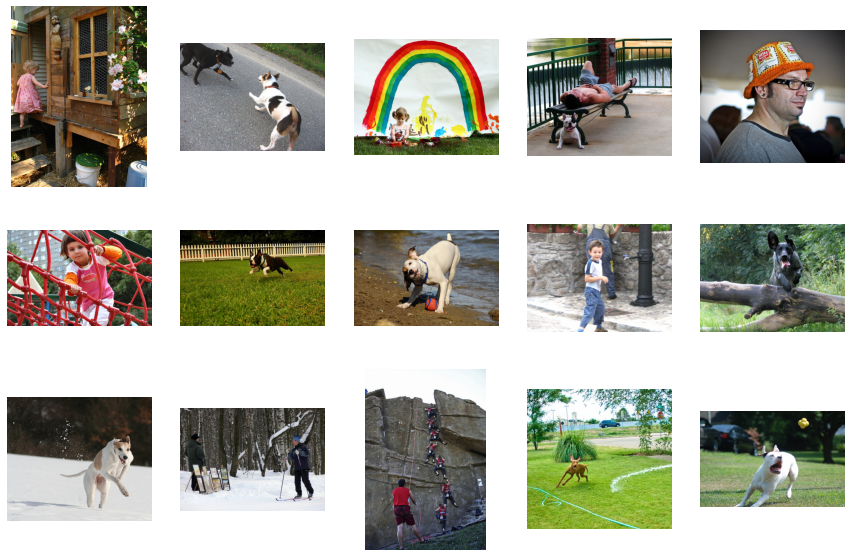

In [8]:
# specify your path
path = images_path

# get a list of all jpeg files in the directory
files = [f for f in os.listdir(path) if f.endswith('.jpg')]

# select a few
files = files[:15]

# adjust plot size
plt.figure(figsize=(15, 10))

# go through each file
for i, file in enumerate(files):
    img = Image.open(os.path.join(path, file))
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.imshow(img)

# render the plot
plt.subplots_adjust(hspace=0) 
plt.show()

#### Size of the images

In [9]:
# specify your path
path = images_path

# get a list of all jpeg files in the directory
files = [f for f in os.listdir(path) if f.endswith('.jpg')]

# store the widths and heights of the images
width_list = []
height_list = []

# iterate through the images
for file in files:
    img = Image.open(os.path.join(path, file))
    width, height = img.size
    width_list.append(width)
    height_list.append(height)

# genrate a dataframe with the info
sizes = pd.DataFrame({"widths": width_list, "heights": height_list})

In [10]:
sizes.head()

,widths,heights
0,375,500
1,500,375
2,500,400
3,500,410
4,500,461


The images are of **different size**.

In [11]:
sizes.describe()

,widths,heights
count,8091.000000,8091.000000
mean,457.872204,397.251885
std,68.659411,75.670168
min,164.000000,127.000000
25%,400.000000,333.000000
50%,500.000000,375.000000
75%,500.000000,500.000000
max,500.000000,500.000000


The **largest** image is at most **500x500**, and the **smallest**, at most **164x127**.
The average size is **458x397**.

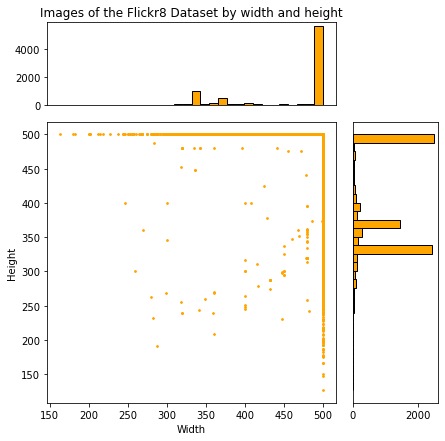

In [12]:
# create a grid for the plot
gs = GridSpec(4,4)

# define the size of the plot
plt.figure(figsize=(7, 7))

# create main scatter plot
ax_joint = plt.subplot(gs[1:4,0:3])
ax_joint.scatter(sizes['widths'], sizes['heights'], s=3, color='orange')
ax_joint.set_xlabel('Width')
ax_joint.set_ylabel('Height')

# create histogram for widths at the top
ax_marg_x = plt.subplot(gs[0,0:3])
ax_marg_x.hist(sizes['widths'], bins=30, color='orange', edgecolor='black')
ax_marg_x.set(title='Images of the Flickr8 Dataset by width and height')

# create histogram for heights at the right
ax_marg_y = plt.subplot(gs[1:4,3])
ax_marg_y.hist(sizes['heights'], bins=30, orientation="horizontal", color='orange', edgecolor='black')

# remove labels from histograms
ax_marg_x.set_xticks([])
ax_marg_y.set_yticks([])

plt.show()

Most of the images appear to be rather big. **Most of them have width 500**, whereas their height is more distributed, being either 500 or around 375 in most cases.

## Captions

#### Examples of captions

In [13]:
list(dataset.captions)[0:10]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .',
 'A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'Two dogs on pavement moving toward each other .']

#### Length of the captions

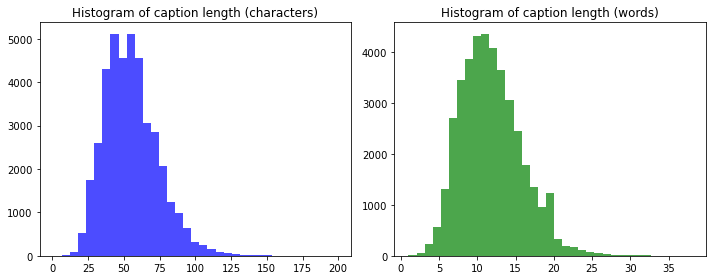

In [14]:
captions = list(dataset.captions)

# calculate lengths of sentences in terms of characters
lengths_chars = [len(caption) for caption in captions]

# calculate lengths of sentences in terms of words
lengths_words = [len(caption.split()) for caption in captions]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot histogram of sentence lengths in terms of characters
axs[0].hist(lengths_chars, bins=35, color='blue', alpha=0.7)
axs[0].set_title('Histogram of caption length (characters)')

# plot histogram of sentence lengths in terms of words
axs[1].hist(lengths_words, bins=35, color='green', alpha=0.7)
axs[1].set_title('Histogram of caption length (words)')

plt.tight_layout()
plt.show()

The caption **length** in terms of characters and words is **normally distributed**.

In [15]:
print('Mean length of a caption (in characters):', np.mean(lengths_chars))
print('Mean length of a caption (in words)     :', np.mean(lengths_words))

Mean length of a caption (in characters): 55.134297367445306
Mean length of a caption (in words)     : 11.78259794833766


A caption is **usually 12 words long**.

#### Most common words

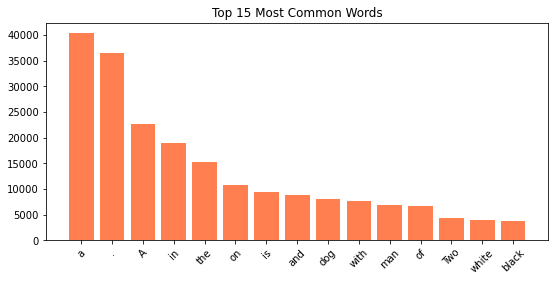

In [16]:
captions = list(dataset.captions)

# Split the sentences into words
words = [word for caption in captions for word in caption.split()]

# Use Counter to count how often each word appears
counter = Counter(words)

# Extract words and counts as separate lists for bar chart
words, counts = zip(*counter.most_common(15))

# Display a bar chart
plt.figure(figsize=(9,4))
plt.bar(words, counts, color='coral')
plt.title('Top 15 Most Common Words')
plt.xticks(rotation=45)
plt.show()

#### Checking the frequency of particular words

In [17]:
words, counts = zip(*counter.most_common(5000))
freqs = pd.DataFrame({'word': words, 'frequency': counts})

In [18]:
freqs[freqs['word'] == 'man']

,word,frequency
10,man,6829


In [19]:
freqs[freqs['word'] == 'woman']

,word,frequency
18,woman,3228


There seems to be a slight bias towards the appearence of `man` in the captions, as opposed to `woman`. **This could bias the model**.

## Transformations before training

Before feeding an image to the model, it is transformed to a convenient Tensor format.

The image starts like this:

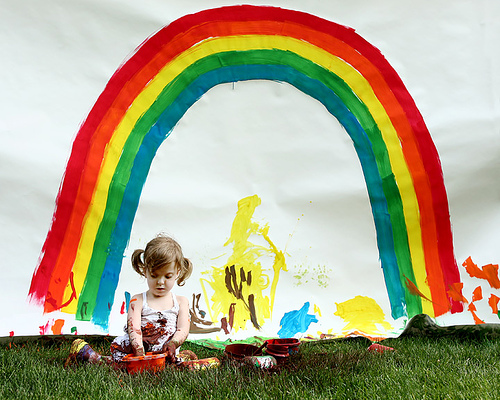

In [20]:
path = images_path
files = [f for f in os.listdir(path) if f.endswith('.jpg')]
file= files[2]
img = Image.open(os.path.join(path, file))
img

In [21]:
img.size

(500, 400)

And when processed by the dataloader (using the `__getitem` method in the `FlickrDataset` class), it is transformed like this:

**1. Resizing to 226 pixels of height (maintaining the aspect)**

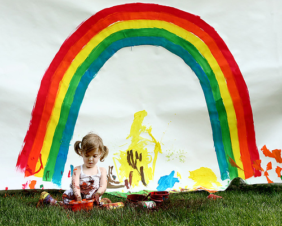

In [22]:
img = T.Resize(226)(img); img

In [23]:
img.size

(282, 226)

**2. Random crop of size 224x224** (necessary for ResNet input in the Encoder)

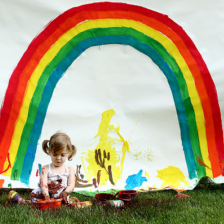

In [24]:
img = T.RandomCrop(224)(img); img

**3. Transforming to Tensor format**

In [25]:
img = T.ToTensor()(img); img

tensor([[[0.8000, 0.8000, 0.8000,  ..., 0.8627, 0.8706, 0.8745],
         [0.8118, 0.8000, 0.7961,  ..., 0.8667, 0.8706, 0.8784],
         [0.8235, 0.8157, 0.8078,  ..., 0.8706, 0.8706, 0.8784],
         ...,
         [0.2706, 0.3608, 0.2667,  ..., 0.4000, 0.3882, 0.3922],
         [0.3216, 0.3137, 0.2706,  ..., 0.4980, 0.4235, 0.2980],
         [0.3765, 0.3216, 0.2235,  ..., 0.5490, 0.3255, 0.3686]],

        [[0.8275, 0.8275, 0.8275,  ..., 0.8863, 0.8941, 0.8980],
         [0.8392, 0.8275, 0.8235,  ..., 0.8902, 0.8941, 0.9020],
         [0.8510, 0.8431, 0.8353,  ..., 0.8902, 0.8941, 0.9020],
         ...,
         [0.4000, 0.4549, 0.3647,  ..., 0.4863, 0.4627, 0.4745],
         [0.4353, 0.3804, 0.3725,  ..., 0.5412, 0.4941, 0.4196],
         [0.4824, 0.4314, 0.3294,  ..., 0.6196, 0.4039, 0.4706]],

        [[0.8000, 0.8000, 0.7961,  ..., 0.8706, 0.8784, 0.8824],
         [0.8118, 0.8000, 0.7961,  ..., 0.8745, 0.8784, 0.8863],
         [0.8235, 0.8157, 0.8078,  ..., 0.8784, 0.8824, 0.

**4. Normalizing the tensor** (These are standard values that come from the ImageNet dataset (a big dataset of images containing more than 1 milion images).

In [26]:
img = T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(img); img

tensor([[[ 1.3755,  1.3755,  1.3755,  ...,  1.6495,  1.6838,  1.7009],
         [ 1.4269,  1.3755,  1.3584,  ...,  1.6667,  1.6838,  1.7180],
         [ 1.4783,  1.4440,  1.4098,  ...,  1.6838,  1.6838,  1.7180],
         ...,
         [-0.9363, -0.5424, -0.9534,  ..., -0.3712, -0.4226, -0.4054],
         [-0.7137, -0.7479, -0.9363,  ...,  0.0569, -0.2684, -0.8164],
         [-0.4739, -0.7137, -1.1418,  ...,  0.2796, -0.6965, -0.5082]],

        [[ 1.6583,  1.6583,  1.6583,  ...,  1.9209,  1.9559,  1.9734],
         [ 1.7108,  1.6583,  1.6408,  ...,  1.9384,  1.9559,  1.9909],
         [ 1.7633,  1.7283,  1.6933,  ...,  1.9384,  1.9559,  1.9909],
         ...,
         [-0.2500, -0.0049, -0.4076,  ...,  0.1352,  0.0301,  0.0826],
         [-0.0924, -0.3375, -0.3725,  ...,  0.3803,  0.1702, -0.1625],
         [ 0.1176, -0.1099, -0.5651,  ...,  0.7304, -0.2325,  0.0651]],

        [[ 1.7511,  1.7511,  1.7337,  ...,  2.0648,  2.0997,  2.1171],
         [ 1.8034,  1.7511,  1.7337,  ...,  2

All this transformations are encapsulated in the variable `transforms` in the code.